Загрузка данных...
Загружено 9900 точек
Кластеризация...
Найдено кластеров: 3
Кластер 1: 3200 точек
Кластер 2: 3500 точек
Кластер 3: 3200 точек
Поиск центроидов...

=== РЕЗУЛЬТАТЫ ===
Кластер 1: центроид в точке (7.563000, 5.851000)
Кластер 2: центроид в точке (0.549000, 5.016000)
Кластер 3: центроид в точке (4.146000, -0.294000)

Строим график...


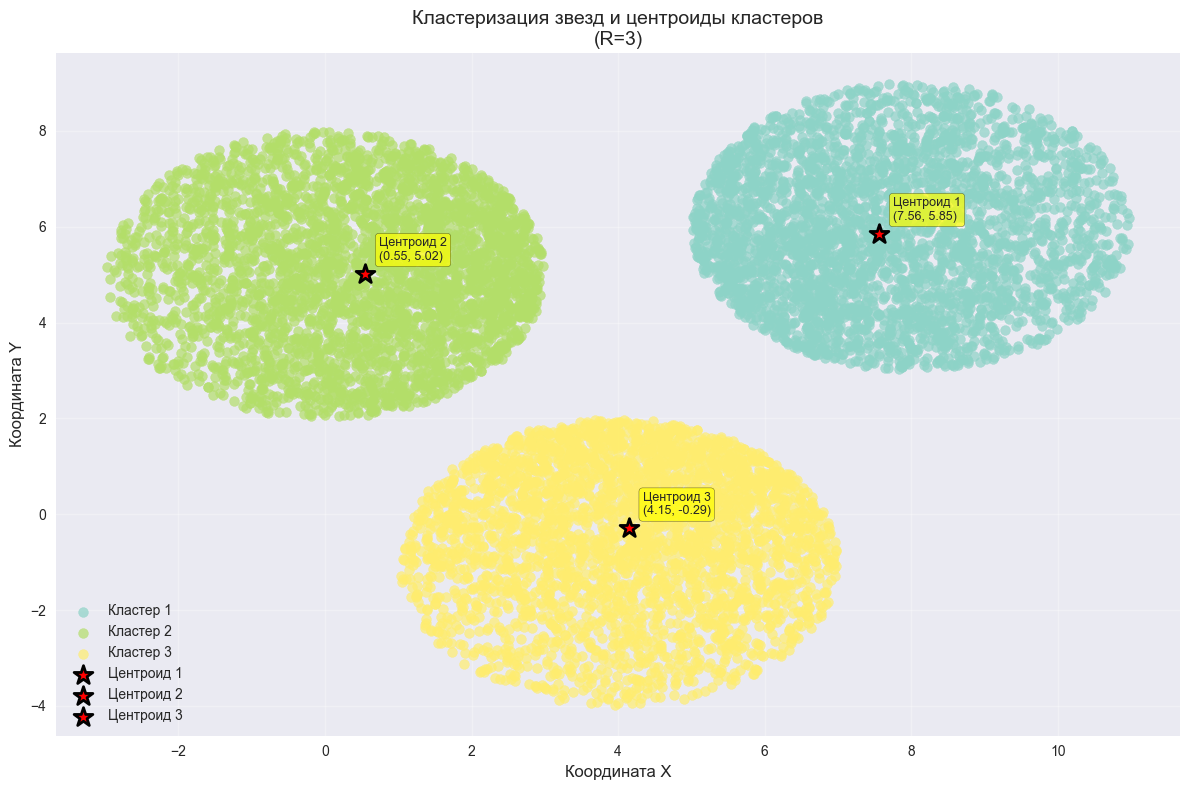

Координаты всех центроидов:
Кластер 1: [7.5630000000, 5.8510000000]
Кластер 2: [0.5490000000, 5.0160000000]
Кластер 3: [4.1460000000, -0.2940000000]


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from scipy.spatial import distance
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')

def load_data(filename):
    data = pd.read_csv(filename, sep=';', decimal=",")
    
    coords = data.iloc[:, :2].values
    coords = coords.astype(float)
    return coords

def cluster_data(coords, eps=0.8):
    clustering = DBSCAN(eps=eps, min_samples=1).fit(coords)
    labels = clustering.labels_
    return labels

def find_centroids(coords, labels):
    unique_labels = np.unique(labels)
    centroids = []
    centroid_indices = []
    
    for k in unique_labels:
        cluster_points = coords[labels == k]
        n_points = len(cluster_points)
        
        if n_points == 1:
            centroids.append(cluster_points[0])
            centroid_indices.append(np.where(labels == k)[0][0])
            continue
        
        min_sum_dist = float('inf')
        best_centroid_idx = -1
        
        for i in range(n_points):
            dists = distance.cdist([cluster_points[i]], cluster_points, 'euclidean')[0]
            sum_dist = np.sum(dists)
            
            if sum_dist < min_sum_dist:
                min_sum_dist = sum_dist
                best_centroid_idx = i
        
        cluster_indices = np.where(labels == k)[0]
        global_idx = cluster_indices[best_centroid_idx]
        
        centroids.append(cluster_points[best_centroid_idx])
        centroid_indices.append(global_idx)
    
    return np.array(centroids), centroid_indices

def plot_clusters(coords, labels, centroids, centroid_indices):
    plt.figure(figsize=(12, 8))
    
    unique_labels = np.unique(labels)
    colors = plt.cm.Set3(np.linspace(0, 1, len(unique_labels)))
    
    for k, color in zip(unique_labels, colors):
        cluster_points = coords[labels == k]
        
        if k == -1:
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                       c='gray', s=50, alpha=0.6, label='Шум')
        else:
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                       c=[color], s=50, alpha=0.7, label=f'Кластер {k+1}')
    
    for i, (centroid, idx) in enumerate(zip(centroids, centroid_indices)):
        plt.scatter(centroid[0], centroid[1], 
                   c='red', s=200, marker='*', edgecolors='black', 
                   linewidth=2, label=f'Центроид {i+1}')
        
        plt.annotate(f'Центроид {i+1}\n({centroid[0]:.2f}, {centroid[1]:.2f})', 
                    xy=(centroid[0], centroid[1]), 
                    xytext=(10, 10), textcoords='offset points',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                    fontsize=9)
    
    plt.xlabel('Координата X', fontsize=12)
    plt.ylabel('Координата Y', fontsize=12)
    plt.title('Кластеризация звезд и центроиды кластеров\n(R=3)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

def main(filename):
    coords = load_data(filename)
    print(f"Загружено {len(coords)} точек")
    
    print("Кластеризация...")
    labels = cluster_data(coords)
    n_clusters = len(np.unique(labels))
    print(f"Найдено кластеров: {n_clusters}")
    
    for k in range(n_clusters):
        cluster_size = np.sum(labels == k)
        print(f"Кластер {k+1}: {cluster_size} точек")
    
    print("Поиск центроидов...")
    centroids, centroid_indices = find_centroids(coords, labels)
    
    print("\n=== РЕЗУЛЬТАТЫ ===")
    for i, centroid in enumerate(centroids):
        print(f"Кластер {i+1}: центроид в точке ({centroid[0]:.6f}, {centroid[1]:.6f})")
    
    print("\nСтроим график...")
    plot_clusters(coords, labels, centroids, centroid_indices)
    
    return coords, labels, centroids

from sklearn.neighbors import NearestNeighbors



# Использование:
if __name__ == "__main__":
    filename = "27_B_17834.csv"
    
    coords, labels, centroids = main(filename)
    # Дополнительная информация
    print("Координаты всех центроидов:")
    for i, centroid in enumerate(centroids):
        print(f"Кластер {i+1}: [{centroid[0]:.10f}, {centroid[1]:.10f}]")